In [51]:
#####I’ll start this Netflix data analysis task with Python by importing the dataset and all the Python libraries needed for this task:
import numpy as np
import  pandas as pd
import plotly.express as px # for data visualization
#####from textblob import TextBlob # for sentiment analysis
tsunade = pd.read_csv('C:/Users/user/Documents/analyse de données/tp_netflix/netflix_titles.csv')
tsunade.shape


(8807, 12)

In [48]:
#So the data consists of 6234 rows and 12 columns, now let’s look at the column names:
tsunade.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

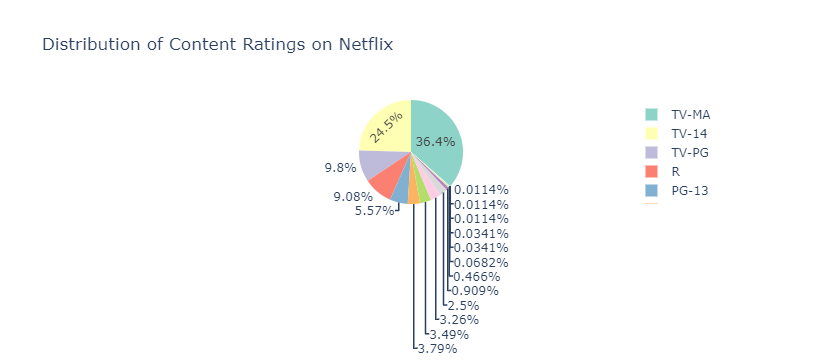

In [49]:
##To begin the task of analyzing Netflix data, I’ll start by looking at the distribution of content ratings on Netflix:
z = tsunade.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

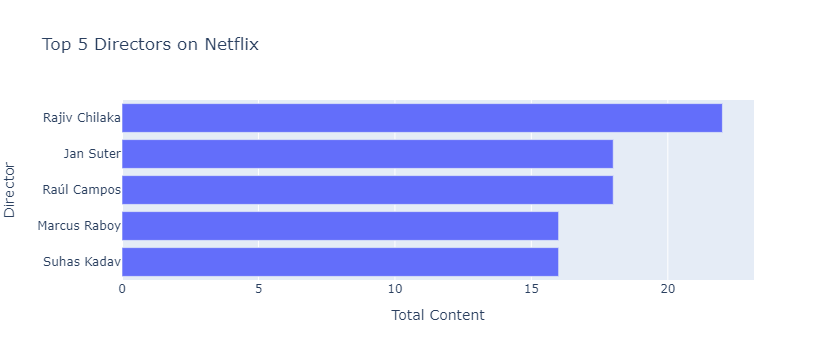

In [50]:
###Now let’s see the top 5 successful directors on this platform:
tsunade['director']=tsunade['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=tsunade['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

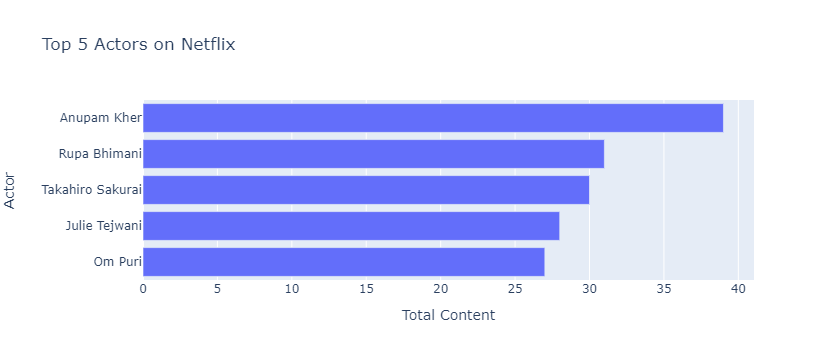

In [53]:
####Now let’s have a look at the top 5 successful actors on this platform:

tsunade['cast']=tsunade['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=tsunade['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()

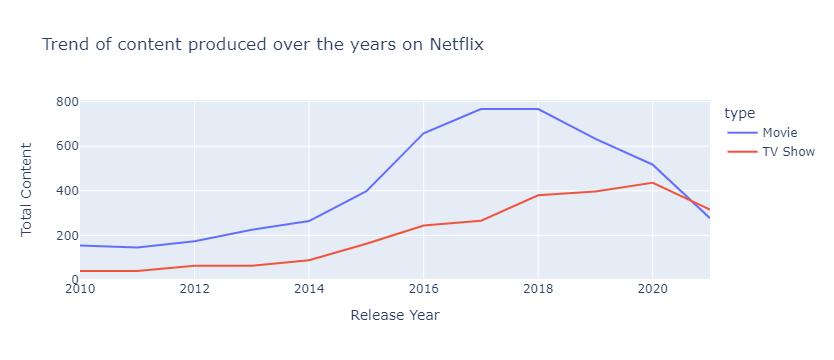

In [55]:
#### The next thing to analyze from this data is the trend of production over the years on Netflix:
df1=tsunade[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()
